In [5]:
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import numpy as np
import scipy
from numpy import *

def plot_contours(fisher, pos, i, j, nstd=1., ax=None, resize=False, **kwargs):
  """
  Plot 2D parameter contours given a Hessian matrix of the likelihood
  """
  
  def eigsorted(cov):
    vals, vecs = linalg.eigh(cov)
    order = vals.argsort()[::-1]
    return vals[order], vecs[:, order]

  mat = fisher
  cov = np.linalg.inv(mat)
  sigma_marg = lambda i: np.sqrt(cov[i, i])

  if ax is None:
      ax = plt.gca()

  # Extracts the block we are interested in
  cov = cov[:,[i,j]][[i,j],:]
  vals, vecs = eigsorted(cov)
  theta = degrees(np.arctan2(*vecs[:, 0][::-1]))

  # Width and height are "full" widths, not radius
  width, height = 2 * nstd * sqrt(vals)
  xy = [pos[i], pos[j]]
  ellip = Ellipse(xy=xy, width=width,
                  height=height, angle=theta, **kwargs)

  ax.add_artist(ellip)
  if resize:
    sz = max(width, height)
    s1 = 1.5*nstd*sigma_marg(i)
    s2 = 1.5*nstd*sigma_marg(j)
    ax.set_xlim(pos[i] - s1, pos[i] + s1)
    ax.set_ylim(pos[j] - s2, pos[j] + s2)
  plt.draw()
  return ellip

In [6]:
fisher_10 = np.load('../scripts/reference.npz')['F_wprior']
fisher_9 = np.load('../scripts/reference_9bin.npz')['F_wprior']
fisher_8 = np.load('../scripts/reference_8bin.npz')['F_wprior']
fisher_7 = np.load('../scripts/reference_7bin.npz')['F_wprior']
fisher_sompz = np.load('../scripts/sompz_sc1_d4.npz')['F_wprior']

In [7]:
fid_params = np.array([ 0.831 ,  0.2664,  0.0492,  0.6727,  0.9645, -1.    ,  0.    ,
        0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,
        0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,
        0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  1.    ,
        0.    ])

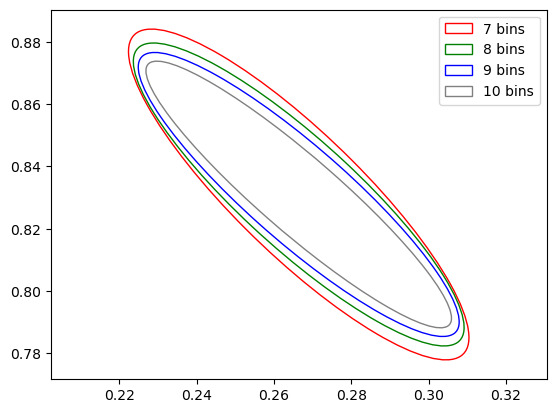

In [10]:
plot_contours(fisher_7, fid_params, 1, 0, resize=True, color='r', fc='none', label='7 bins')
plot_contours(fisher_8, fid_params, 1, 0, resize=True, color='g', fc='none', label='8 bins')
plot_contours(fisher_9, fid_params, 1, 0, resize=True, color='b', fc='none', label='9 bins')
plot_contours(fisher_10, fid_params, 1, 0, resize=True, color='grey', fc='none', label='10 bins')

plt.legend()

In [ ]:
Fisher = []
for i in range(6):
    for j in [4,5]:
        Fisher.append(np.load('../scripts/sompz_sc'+str(i+1)+'_d'+str(j)+'.npz')['F_wprior']